In [1]:
%pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importando Bibliotecas

In [2]:
import numpy as np, random
import pingouin as pg
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t as t_dist


### Dados para os Testes de Normalidade

Testar se seus dados seguem uma distribuição normal

Então iremos avaliar o p_valor:

- p_valor > 0.05 → dados parecem normais

- p_valor ≤ 0.05 → dados provavelmente NÃO são normais

In [3]:
#dados = np.random.normal(0, 1, 500)

In [4]:
dados = random.choice([
    np.random.normal(0, 1, 1000),
    np.random.exponential(1, 1000),
    np.random.uniform(-2, 2, 1000),
    np.concatenate([np.random.normal(0, 1, 950), np.random.uniform(10, 20, 50)])
])
dados

array([ 2.43490787e+00, -5.93008335e-01,  6.25021704e-01, -1.51604475e+00,
       -2.80005051e-01,  1.36179040e-01,  4.43640114e-01, -1.10239594e+00,
        1.16695339e+00, -2.08364630e+00,  8.66171258e-01, -1.26190505e+00,
        2.86664655e+00,  2.03410207e+00, -3.89090087e-01,  7.79884289e-01,
        8.71076053e-01, -5.91438806e-01,  1.85177804e-01,  4.26329605e-01,
        8.44427348e-01,  2.07320225e-01,  6.68921732e-01, -3.07790004e-02,
        9.34764363e-02,  1.81799153e+00,  1.09851986e+00,  9.85301786e-01,
       -5.14465199e-01, -9.95771938e-01,  1.34189918e+00,  2.18762532e+00,
        2.35180874e-02, -1.09907543e+00,  1.09317776e+00, -1.29216786e+00,
       -4.20416849e-01, -3.24339023e-01, -8.97179251e-01, -1.69787490e-01,
       -2.80888269e-01,  8.57717174e-01, -1.83522658e+00,  1.00454652e+00,
       -1.31975536e+00,  5.33098705e-01,  2.46985608e-01, -1.04004181e+00,
       -8.99422765e-01,  1.38406007e+00, -5.97305176e-01,  1.22196705e-01,
        3.09567633e-01, -

### Teste Kolmogorov-Smirnov

### Teste Kolmogorov-Smirnov Manual

In [5]:
def kolmogorov_smirnov(data):
    # Organize os dados em ordem crescente
    data_sorted = np.sort(data)
    n = len(data_sorted)
    
    # Função de distribuição empírica F_n(x)
    F_n = np.arange(1, n+1) / n
    
    # Função de distribuição acumulada da normal F(x)
    F_x = norm.cdf(data_sorted)
    
    # Calcula o D máximo
    D = np.max(np.abs(F_n - F_x))
    p_value = kstest(data, 'norm')[1]
    
    return (D,p_value)

In [6]:
print(f"Kolmogorov-Smirnov Manual: {kolmogorov_smirnov(dados)[0]:.4f} | p-value: {kolmogorov_smirnov(dados)[1]:.4f}")


Kolmogorov-Smirnov Manual: 0.0164 | p-value: 0.9171


### Teste Kolmogorov-Smirnov Biblioteca

In [7]:
estatistica, p_valor = kstest(dados, 'norm')
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.0174, 
p-valor = 0.9171


In [8]:
if p_valor < 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


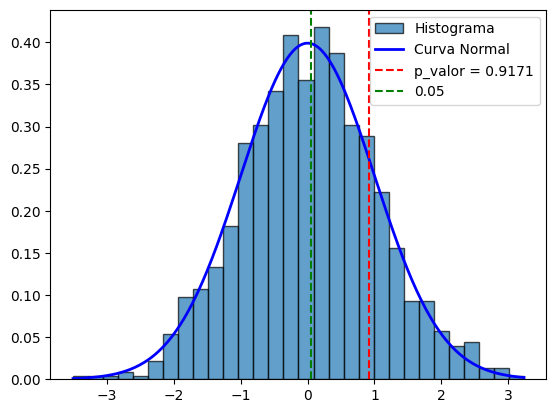

In [9]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Wilk

### Teste Shapiro-Wilk Manual

In [10]:
def shapiro_wilk(dados):
    dados = np.sort(dados)
    n = len(dados)
    
    # Média e desvio padrão da amostra
    media = np.mean(dados)
    desvio = np.std(dados, ddof=1)
    
    # Estatísticas padronizadas
    z = (dados - media) / desvio

    # Coeficientes de Shapiro aproximados (usaremos simetria da normal)
    # Para isso usamos quantis da normal padrão
    m = norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])
    m = m / np.linalg.norm(m)  # Normaliza m

    # Soma ponderada dos dados ordenados com os coeficientes m
    W_numerador = (np.sum(m * dados))**2
    W_denominador = np.sum((dados - media)**2)

    W = W_numerador / W_denominador
    p_valor = shapiro(dados)[1]
    return (W, p_valor)

In [11]:
print(f"Shapiro-Wilk Manual: {shapiro_wilk(dados)[0]:.4f} | p-value: {shapiro_wilk(dados)[1]:.4f}")

Shapiro-Wilk Manual: 0.9988 | p-value: 0.7431


### Teste Shapiro-Wilk Biblioteca


In [12]:
estatistica, p_valor = shapiro(dados)
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.9988, 
p-valor = 0.7431


In [13]:
if p_valor <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


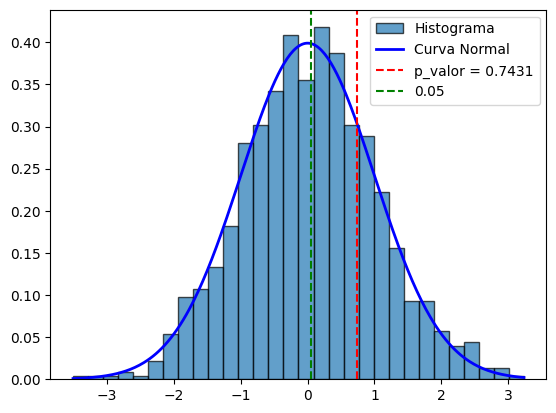

In [14]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Francia

### Teste Shapiro-Francia Manual

In [15]:
def shapiro_francia_test(x):
    x = np.sort(x)
    n = len(x)

    # Média dos dados
    x_mean = np.mean(x)

    # Quantis esperados da normal padrão
    m = norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])
    m_mean = np.mean(m)

    # Coeficientes 'a' (normalizados)
    u = m - m_mean
    a = u / np.sqrt(np.sum(u ** 2))

    # Numerador e denominador de W'
    numerator = (np.sum(a * x)) ** 2
    denominator = np.sum((x - x_mean) ** 2)

    W_prime = numerator / denominator
    p_value = shapiro(x)[1]
    return (W_prime, p_value)

In [16]:
stat, p = shapiro_francia_test(dados)
print(f"Shapiro-Francia: W' = {stat:.4f}, p-valor = {p:.4f}")

Shapiro-Francia: W' = 0.9988, p-valor = 0.7431


In [17]:
if p <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


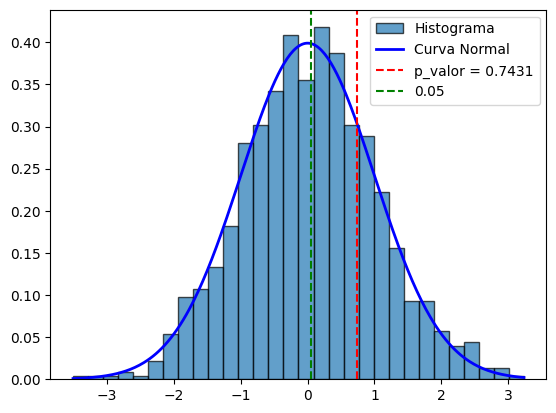

In [18]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Dados para Teste de Média Populacional

Comparar se a média de dois grupos é diferente

Então iremos avaliar o p_valor:

- p > 0.05 → as médias são provavelmente iguais

- p ≤ 0.05 → as médias são provavelmente diferentes

In [19]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])

grupo2 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])

In [20]:
grupo1

array([1.91581872, 0.11373242, 0.30794004, 0.01770033, 0.60360775,
       0.77881454, 0.79366616, 3.12721699, 0.67313997, 0.094587  ,
       0.0779666 , 1.44356793, 0.53241953, 0.74519593, 0.35536302,
       1.41271113, 0.25238168, 0.28456117, 0.70741263, 1.50183042])

In [21]:
grupo2

array([1.2078381 , 0.49990393, 1.78380748, 1.12044809, 0.88359883,
       0.80758019, 1.50314931, 0.15488474, 0.36684423, 1.3859548 ,
       1.14687733, 0.04510163, 1.38815526, 0.3197745 , 1.55234429,
       1.26433449, 2.24310416, 0.91546168, 2.05076201, 0.1372785 ])

### Teste Z

### Teste Z manual

In [22]:
def teste_z_duas_amostras(grupo1, grupo2, sigma1, sigma2):
    n1, n2 = len(grupo1), len(grupo2)
    media1, media2 = np.mean(grupo1), np.mean(grupo2)

    # Fórmula do Z para duas amostras com desvio conhecido
    z = (media1 - media2) / np.sqrt((sigma1**2)/n1 + (sigma2**2)/n2)

    # P-valor para teste bilateral
    p_valor = 2 * (1 - norm.cdf(abs(z)))

    return z, p_valor

In [23]:
z, p = teste_z_duas_amostras(grupo1, grupo2, sigma1=1, sigma2=1)

In [24]:
print(f"Z = {z:.4f}")
print(f"P-valor = {p:.4f}")

Z = -0.7965
P-valor = 0.4257


In [25]:
if p < 0.05:
    print("Rejeita H0: diferença estatisticamente significativa.")
else:
    print("Não rejeita H0: não há evidência forte de diferença.")

Não rejeita H0: não há evidência forte de diferença.


### Teste TStudent

### Tstudent uma amostra manual

In [26]:
mu = 0

# Calcular a média da amostra (x_bar)
media_amostra = np.mean(grupo1)

# Calcular o desvio padrão amostral (s)
desvio_amostra = np.std(grupo1, ddof=1)  # ddof=1 para desvio padrão amostral

# Calcular o valor t
n = len(grupo1)
t_calculado = (media_amostra - mu) / (desvio_amostra / np.sqrt(n))

# Determinar os graus de liberdade (df)
df = n - 1

# Calcular o valor crítico t para um nível de significância α (por exemplo, 0.05)
alpha = 0.05
t_critico = t_dist.ppf(1 - alpha / 2, df)  # valor crítico para um teste bilateral

# Comparar o valor t calculado com o valor t crítico
rejeitar_H0 = abs(t_calculado) > t_critico

# Exibindo os resultados
print(f"Valor t calculado: {t_calculado:.4f}")

Valor t calculado: 4.5870


### Tstudent uma amostra biblioteca

In [27]:
mu = 0
t_stat, p_value = stats.ttest_1samp(grupo1, mu)

In [28]:
print(f"Valor t calculado: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Média da amostra: {media_amostra:.4f}")

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média da amostra é significativamente diferente de", mu)
else:
    print("Não rejeitar H0: A média da amostra não é significativamente diferente de", mu)

Valor t calculado: 4.5870
Valor p: 0.0002
Média da amostra: 0.7870
Rejeitar H0: A média da amostra é significativamente diferente de 0


### Tstudent Independente Manual

In [29]:
def t_student_duas_amostras(amostra1, amostra2):
    import math
    n1, n2 = len(amostra1), len(amostra2)
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # variância combinada
    sp = math.sqrt(((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2))

    t = (media1 - media2) / (sp * math.sqrt(1/n1 + 1/n2))
    return t

In [30]:
print(f"Tstudent Manual = {t_student_duas_amostras(grupo1, grupo2):.4f}")

Tstudent Manual = -1.1274


### Tstudent Independente pela Biblioteca

In [31]:
stat, p = ttest_ind(grupo1, grupo2, equal_var=True)
print(f"t-Student: estatística = {stat:.4f}, p-valor = {p:.4f}")

t-Student: estatística = -1.1274, p-valor = 0.2666


In [32]:
if p <= 0.05:
    print("As médias são diferentes (rejeita H0)")
else:  
    print("As médias são significativamente iguais (não rejeita H0)")

As médias são significativamente iguais (não rejeita H0)


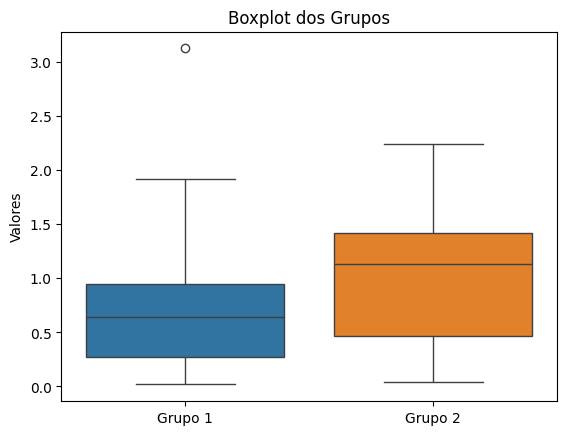

In [33]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Tstudent Emparelhado

In [34]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 10), np.random.uniform(10, 20, 10)])  
])

# Simulando uma mudança no grupo (grupo2) para amostras pareadas
grupo2 = grupo1 + np.random.normal(0, 0.5, 20)

In [35]:
# Calcular as diferenças (d = grupo1 - grupo2)
diferencas = grupo1 - grupo2

# Calcular a média das diferenças (d_bar)
media_diferencas = np.mean(diferencas)

# Calcular o desvio padrão das diferenças (s_d)
desvio_diferencas = np.std(diferencas, ddof=1)  # ddof=1 para obter o desvio padrão amostral

# Calcular o valor t
n = len(diferencas)
t_calculado = media_diferencas / (desvio_diferencas / np.sqrt(n))

# Exibindo os resultados
print(f"Valor de t calculado: {t_calculado:.4f}")

Valor de t calculado: -1.0624


### Tsudent Emparelhado Pela Biblioteca

In [36]:
t_stat, p_value = stats.ttest_rel(grupo1, grupo2)
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

Estatística t: -1.0624
P-valor: 0.3014


In [37]:
if p_value < 0.05:
    print("Rejeitamos H0: As médias dos dois grupos pareados são diferentes.")
else:
    print("Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.")

Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.


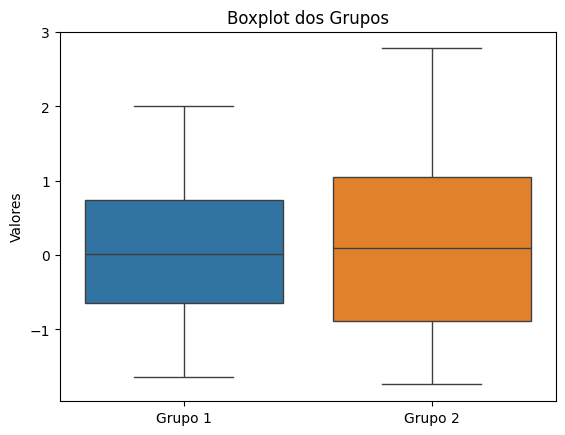

In [38]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Testes de Homogeneidade de variâncias

Então iremos avaliar o p_valor:

- p > 0.05 → as variâncias são provavelmente iguais

- p ≤ 0.05 → as variâncias são provavelmente diferentes

### Teste Bartlett

Teste Bartlett Manual

In [39]:
def bartlett_duas_amostras(amostra1, amostra2):
    import math
    # Calcula o tamanho das amostras
    n1, n2 = len(amostra1), len(amostra2)
    
    # Calcula a média de cada amostra
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    # Calcula a variância de cada amostra
    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # Calcula a variância combinada (sp)
    sp = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)

    # Calcula a estatística A do teste de Bartlett
    A = (n1 + n2 - 2)*math.log(sp) - (n1 - 1)*math.log(var1) - (n2 - 1)*math.log(var2)
    
    # Calcula o fator de correção B
    B = 1 + (1/(3*(2 - 1))) * (1/(n1 - 1) + 1/(n2 - 1) - 1/(n1 + n2 - 2))
    
    # Calcula a estatística do teste
    estatistica = A / B

    # Calcula o p-valor usando a distribuição qui-quadrado com 1 grau de liberdade
    p_valor = 1 - stats.chi2.cdf(estatistica, df=1)
    
    # Retorna a estatística do teste e o p-valor
    return estatistica, p_valor

In [40]:
print(f"Bartlett Manual = {bartlett_duas_amostras(grupo1, grupo2)[0]:.4f} p-valor: {bartlett_duas_amostras(grupo1, grupo2)[1]:.4f}")

Bartlett Manual = 0.8938 p-valor: 0.3445


### Teste Barlett pela Biblioteca

In [41]:
stat, p = bartlett(grupo1, grupo2)
print(f"Bartlett: estatística = {stat:.4f}, p-valor = {p:.4f}")

Bartlett: estatística = 0.8938, p-valor = 0.3445


In [42]:
print("Variancia grupo1:", np.var(grupo1, ddof=1))
print("Variancia grupo2:", np.var(grupo2, ddof=1))

Variancia grupo1: 1.1014871922058678
Variancia grupo2: 1.71236666873233


In [43]:
if p <= 0.05:
    print("Uma ou mais variâncias são diferentes (rejeita H0)")
else:
    print("Todas as variâncias são significamente iguais (não rejeita H0)")

Todas as variâncias são significamente iguais (não rejeita H0)


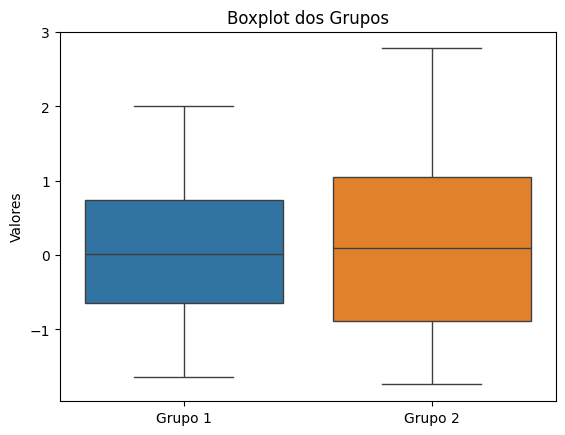

In [44]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()